## Video Link : https://drive.google.com/file/d/1krepX_AuHJdS9KgvvZz6ISaLZs68vQe0/view?usp=sharing

## Project Part B: Customer Churn Prediction

Objective: Customer churn, or customer attrition, refers to when a customer ceases their relationship with a company or service provider. This project aims to build a machine learning model that can predict whether a customer will churn based on their demographic, account, and service-related data.


Problem Statement:
The goal of this project is to develop a classification model that predicts whether a customer will churn. Using demographic data (such as gender, senior citizen status, and tenure), along with information about the services they use (such as internet service, phone service, and online security).
By predicting customer churn, the company can proactively design retention strategies to keep these customers, thereby improving customer satisfaction and reducing financial loss.


#### Importing Libraties

In [6]:
# For Analysis
import numpy as np
import pandas as pd

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#For Feature Selection
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For Modeling
from sklearn.model_selection import train_test_split

#For Validation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Customer_data.csv')
df.head()        # Top rows of dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Display basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Summary Statistics of the dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
# Check for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
# Fill missing values with the median for numerical columns
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)

Data Preprocessing

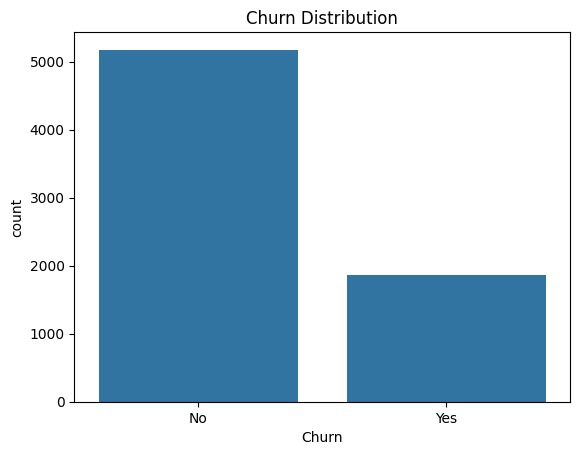

In [12]:
# Plot the distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


Summary of Churn Distribution Chart:


* The bar plot visualizes the distribution of customer churn.

* "No" (Non-churned customers): ~5100 customers.
* "Yes" (Churned customers): ~1900 customers.


* The dataset is imbalanced, with a higher proportion of non-churned customers compared to churned ones.

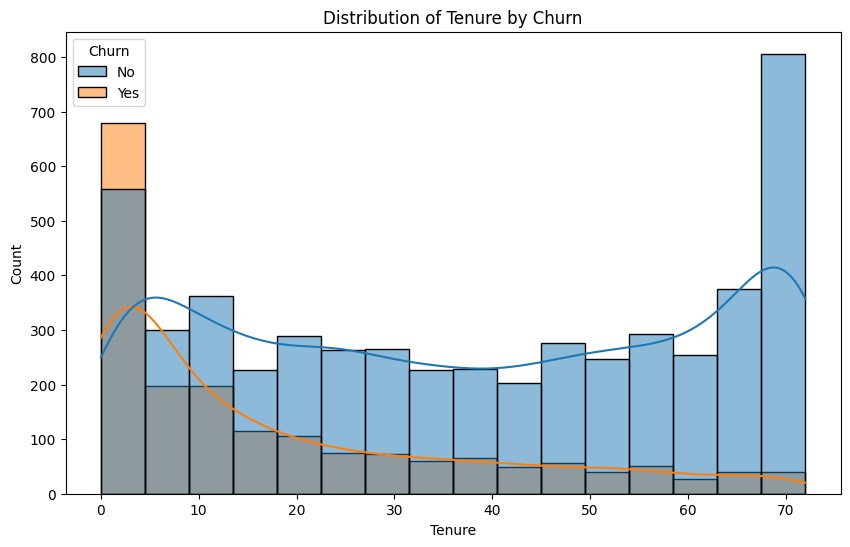

In [13]:
# Distribution of Tenure by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()


Summary of Tenure Distribution by Churn:
*   Short tenure customers (0-10 months) have a higher churn rate, with ~700 churned users at the start.

*  Longer tenure customers (above 60 months) have a lower churn rate, with ~800 non-churned users at 70 months.

*   As customers stay longer, they are less likely to leave. This means that most people who cancel do so early on. To reduce churn, businesses should focus on keeping new customers happy in the first few months.


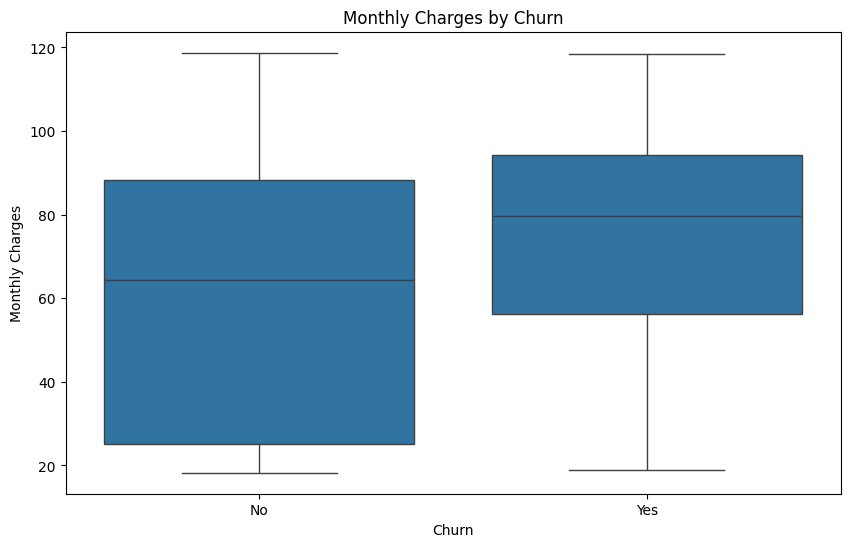

In [14]:
# Boxplot for the Monthly Charges by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Summary of Monthly Charges by Churn


The median monthly charge for customers who did not churn is around $$65, while for those who churned, it's higher, around $80-$85.

*  This indicates that customers with higher monthly charges are more likely to leave.



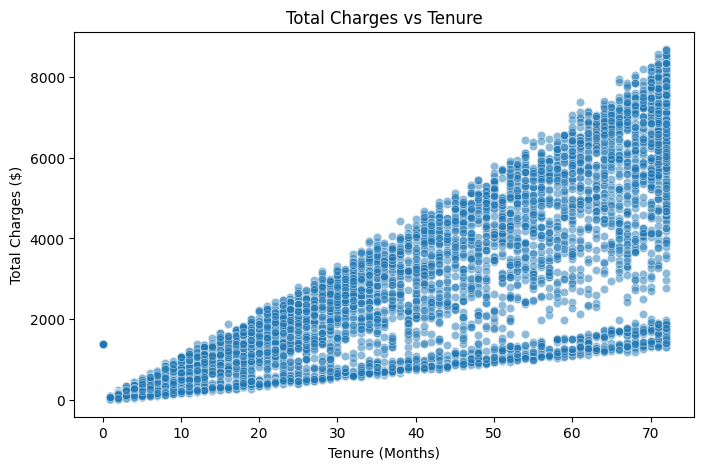

In [15]:
# Scatterplot to show the Total Monthly Charges by Churn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['tenure'], y=df['TotalCharges'], alpha=0.5)
plt.title("Total Charges vs Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Total Charges ($)")
plt.show()


Summary of Scatterplot Total Charges Vs Tenure


*   The total charges increase as tenure increases, showing a strong positive relationship. Customers who stay longer tend to pay more over time.


# # Correlation MatriX

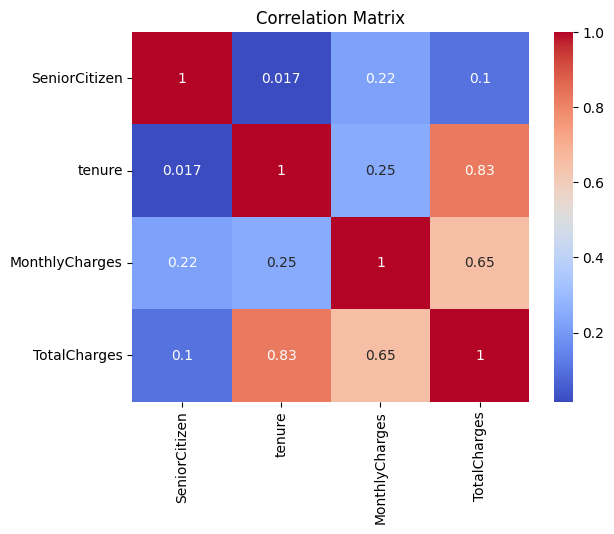

In [16]:
num_cols = list()
for column in df.columns:
  if df[column].dtype != 'object':
    num_cols.append(column)
Correlation_matrix = df[num_cols].corr()
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Summary of Correlation Matrix:

Tenure and total charges have a strong positive correlation (0.83), meaning longer tenure leads to higher total charges. Monthly charges also correlate well with total charges (0.65). Other features show weak correlations.

### # Data Preprocessing

In [17]:
# Encode Categorical Variables
label_encoders = {}
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [18]:
# Select the 6 features you want to use for prediction
X = df[['gender', 'SeniorCitizen', 'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']


In [19]:
# Split data into training & testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Standardize the Feature Scaling
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model using only the 6 features
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Predicitons on the test data
logreg_pred = logreg.predict(X_test)

#Accuracy and performance metrics
logreg_accuracy = accuracy_score(y_test, logreg_pred)


In [22]:
# Display accuracy & Performance matrics
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print(f'\nLogistic Regression Classification Report: ')
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 80.62

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

          No       0.83      0.93      0.88      1036
         Yes       0.70      0.47      0.56       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409



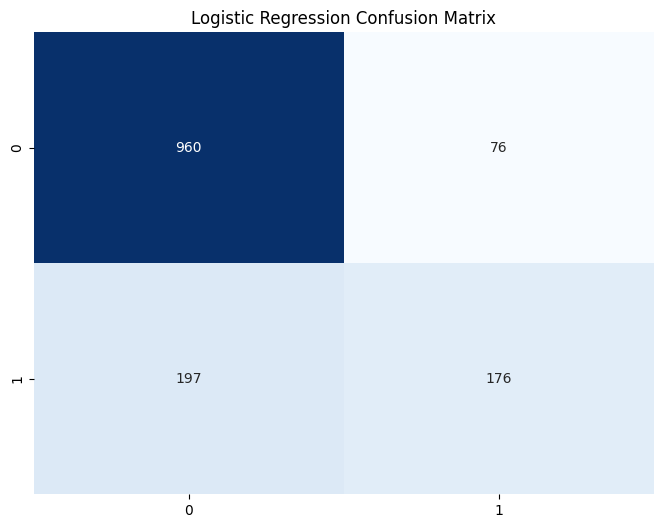

In [23]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logreg_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Summary of Confusion Matrics:

The model correctly predicted 960 non-churn cases and 176 churn cases. However, it misclassified 76 non-churn cases as churn and 197 churn cases as non-churn.

In [24]:
# User input values
gender = float(input("Enter Gender (0 for Female, 1 for Male): "))
SeniorCitizen = float(input("Enter Senior Citizen Status (0 for No, 1 for Yes): "))
Partner = float(input("Enter Partner Status (0 for No, 1 for Yes): "))
tenure = float(input("Enter tenure (in months): "))
monthly_charges = float(input("Enter Monthly Charges: "))
total_charges = float(input("Enter Total Charges: "))

# Convert input to 2D array
user_input = np.array([[gender, SeniorCitizen, Partner, tenure, monthly_charges, total_charges]])

# Apply scaling before prediction
user_input_scaled = Scaler.transform(user_input)

# Predict churn
predicted_churn = logreg.predict(user_input_scaled)

# Output prediction
print(f'Predicted Churn: {"Yes" if predicted_churn[0] == 1 else "No"}')


Enter Gender (0 for Female, 1 for Male): 0
Enter Senior Citizen Status (0 for No, 1 for Yes): 1
Enter Partner Status (0 for No, 1 for Yes): 1
Enter tenure (in months): 34
Enter Monthly Charges: 56
Enter Total Charges: 3400
Predicted Churn: No


Churn Prediction:

The logistic regression model (logreg) predicts whether the customer will churn ("Yes") or stay ("No").

Output Display:

The result is printed, showing "Yes" if the model predicts churn (1) or "No" otherwise.

According to the user input-

A female senior citizen with a partner, 34 months of tenure, $$56 in monthly charges, and $3400 in total charges is predicted not to churn.

## # Key Takeaways from the Model's Performance

### Model Accuracy: 80.6%
1. The model correctly identifies most customers who will stay.
2. It struggles slightly with correctly predicting churn cases (some churners are misclassified as non-churners).

### Customers with Higher Monthly Charges (~$80+):

1. Higher bills increase the likelihood of churn.
2. Customers who pay less per month are more stable.

### Customers with Specific Payment Methods:

Customers using electronic checks have a higher churn rate.
Those using credit cards or bank transfers are more loyal.

### Actionable Insights to Reduce Churn
1. The highest churn rate occurs in the first 10 months.
2. Provide special offers or discounts for new customers in the first year.
3. Assign personalized support (calls/emails) to new customers.

### Adjust Pricing & Offer Flexible Plans
1.  Customers with higher monthly charges are more likely to churn.
2. Offer discounts or add-ons to customers at risk of churn.
3. Provide a custom pricing calculator where customers can adjust features based on their budget.


